In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
np.random.seed(42)

cat_images = np.random.randn(700, 2) + np.array([0, -3])
mouse_images = np.random.randn(700, 2) + np.array([3, 3])
dog_images = np.random.randn(700, 2) + np.array([-3, 3])

In [25]:
feature_set = np.vstack([cat_images, mouse_images, dog_images])
labels = np.array([0]*700 + [1]*700 + [2]*700)
one_hot_labels = np.zeros((2100, 3))

for i in range(2100):
    one_hot_labels[i, labels[i]] = 1

In [26]:
feature_set

array([[ 0.49671415, -3.1382643 ],
       [ 0.64768854, -1.47697014],
       [-0.23415337, -3.23413696],
       ...,
       [-5.38692987,  2.50412183],
       [-1.90269981,  1.43435197],
       [-6.00763234,  3.57117941]])

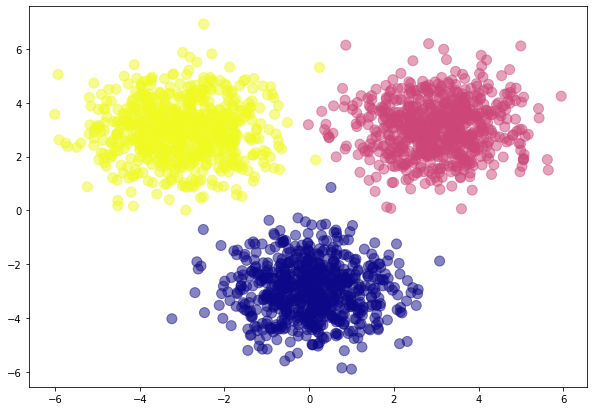

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [28]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum()

nums = np.array([4, 5, 6])
print(softmax(nums))

[0.09003057 0.24472847 0.66524096]


Loss function value:  3678.6580375215335
Loss function value:  4769.205155885303
Loss function value:  3292.5981976367075
Loss function value:  3006.595741573771
Loss function value:  3732.8518262734265
Loss function value:  2774.4374943233283
Loss function value:  2904.4058251981564
Loss function value:  4452.793455554443
Loss function value:  3007.9751097227836
Loss function value:  2819.5603908322632
Loss function value:  3824.4966432916567
Loss function value:  2540.3452549596477
Loss function value:  3595.98459159485
Loss function value:  2686.745467872363
Loss function value:  2316.62727123738
Loss function value:  2176.952822700123
Loss function value:  2704.225481204467
Loss function value:  3145.0231586710397
Loss function value:  4170.91937534195
Loss function value:  2742.675487124176


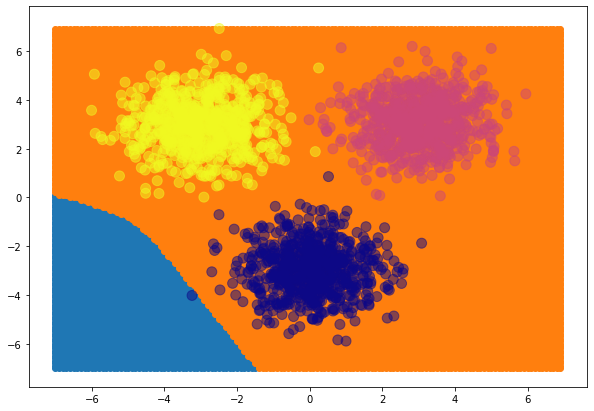

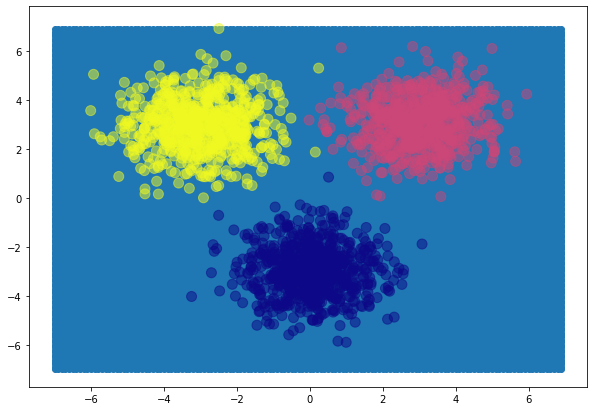

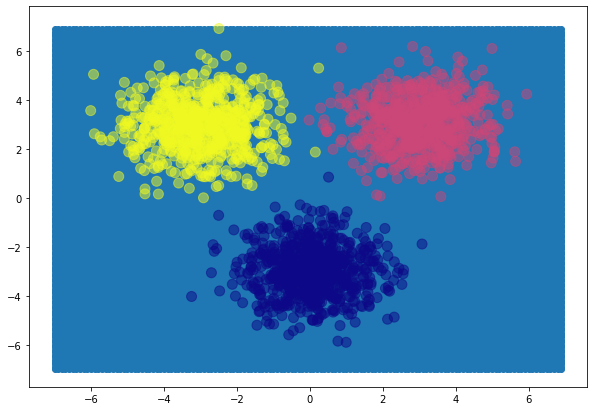

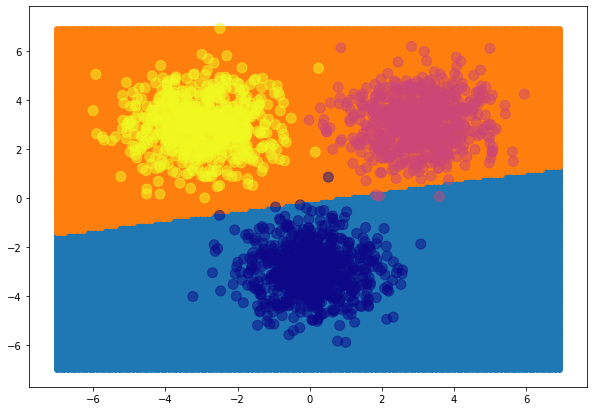

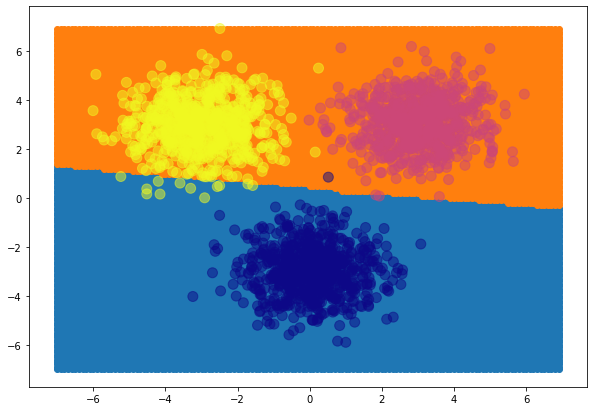

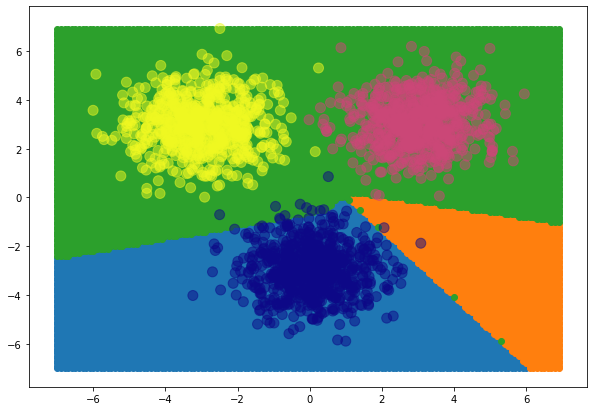

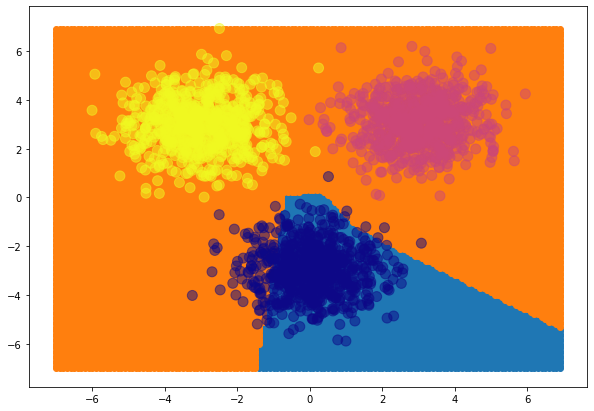

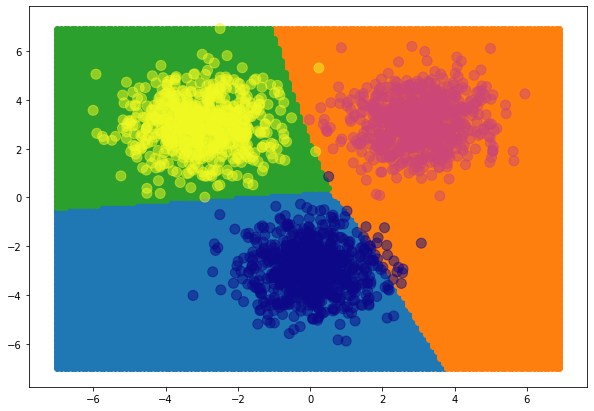

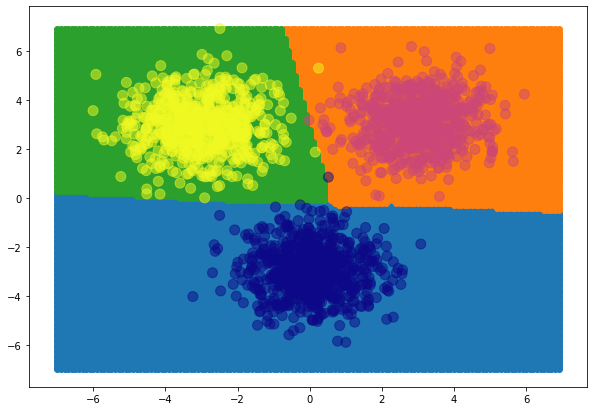

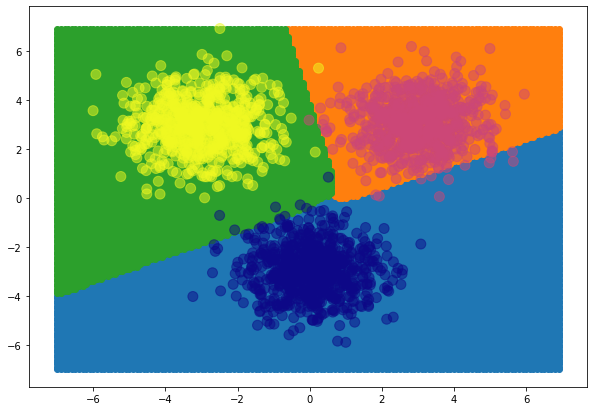

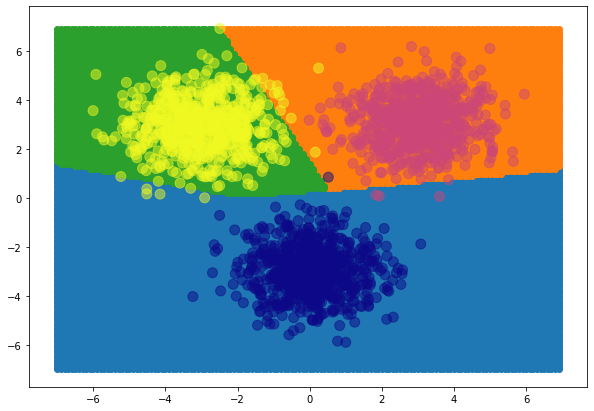

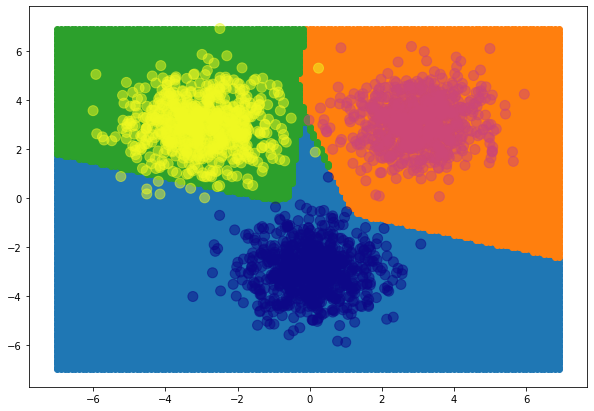

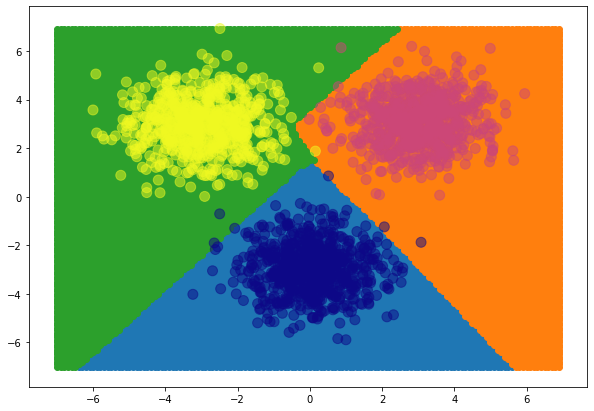

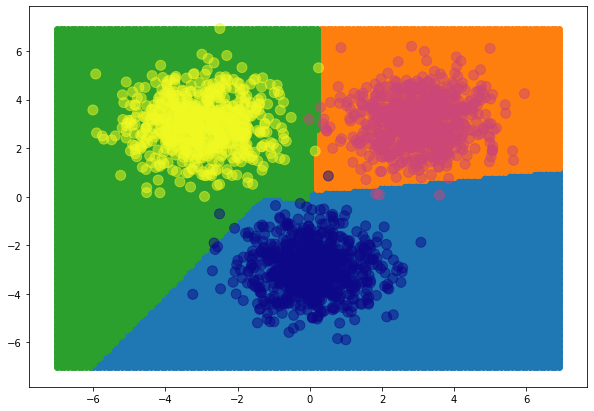

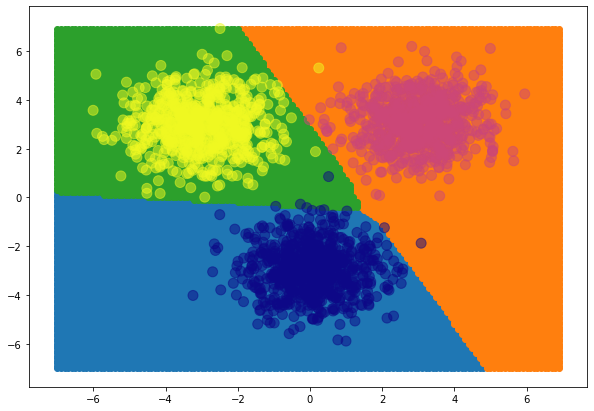

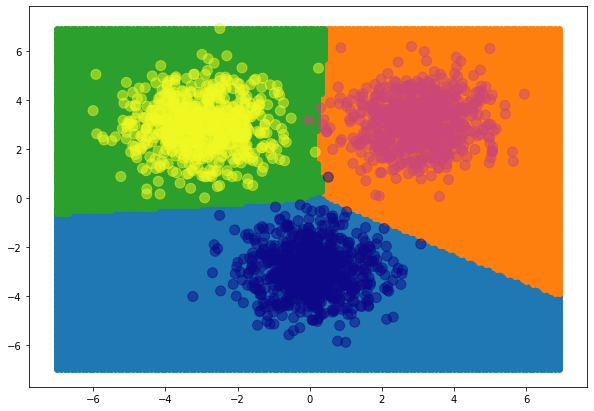

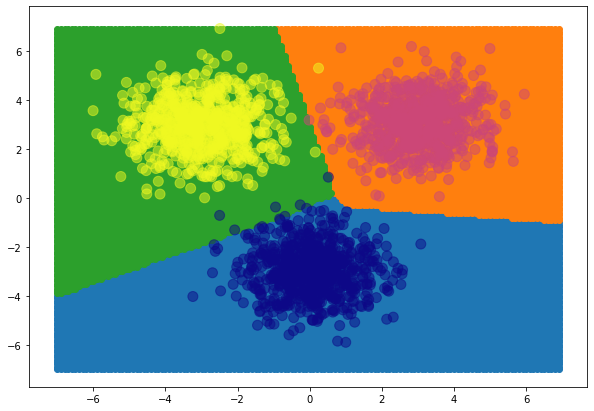

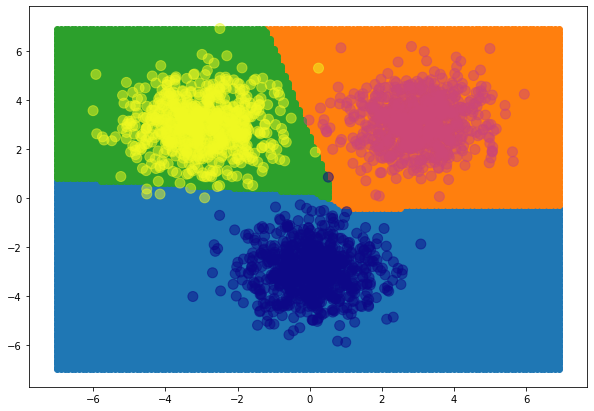

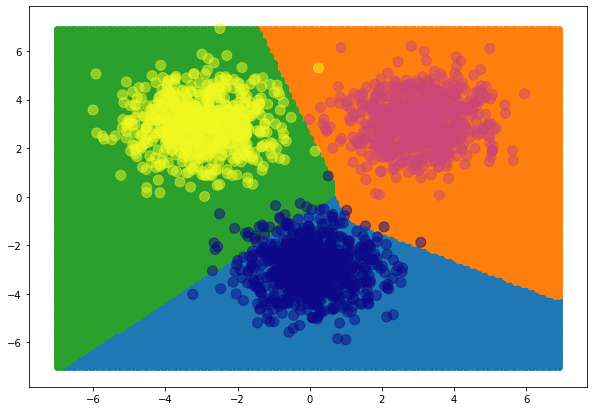

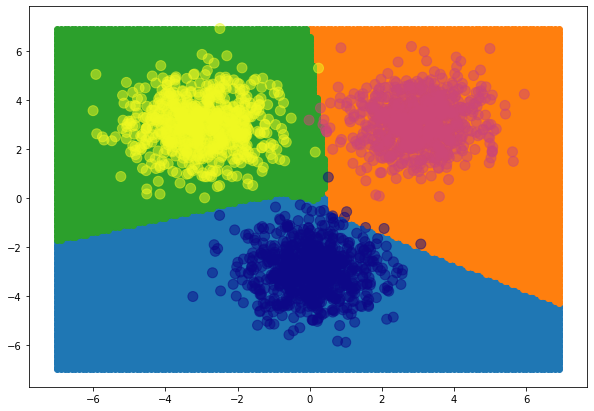

In [36]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

init = 0
for exe in range(20):
    
    instances = feature_set.shape[0]
    attributes = feature_set.shape[1]
    hidden_nodes = 4
    output_labels = 3

    wh = np.random.rand(attributes,hidden_nodes)
    bh = np.random.randn(hidden_nodes)

    wo = np.random.rand(hidden_nodes,output_labels)
    bo = np.random.randn(output_labels)
    lr = 10e-3

    error_cost = []
    
    init = init + 1
    for epoch in range(init):
    ############# feedforward

        # Phase 1
        zh = np.dot(feature_set, wh) + bh
        ah = sigmoid(zh)

        # Phase 2
        zo = np.dot(ah, wo) + bo
        ao = softmax(zo)

    ########## Back Propagation

    ########## Phase 1

        dcost_dzo = ao - one_hot_labels
        dzo_dwo = ah

        dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
        dcost_bo = dcost_dzo

    ########## Phases 2

        dzo_dah = wo
        dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
        dah_dzh = sigmoid_der(zh)
        dzh_dwh = feature_set
        dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

        dcost_bh = dcost_dah * dah_dzh

        # Update Weights ================

        wh -= lr * dcost_wh
        bh -= lr * dcost_bh.sum(axis=0)

        wo -= lr * dcost_wo
        bo -= lr * dcost_bo.sum(axis=0)

        if epoch % 200 == 0:
            loss = np.sum(-one_hot_labels * np.log(ao))
            print('Loss function value: ', loss)
            error_cost.append(loss)
    
    
    # For each exe, save a figure:
    def predmap(x,y):

        # Phase 1
        zh = np.dot([[x,y]], wh) + bh
        ah = sigmoid(zh)

        # Phase 2
        zo = np.dot(ah, wo) + bo
        ao = softmax(zo)

        maxi = max(ao[0])

        if maxi == ao[0][0]:
            color = 'blue'
        elif maxi == ao[0][1]:
            color = 'green'
        elif maxi == ao[0][2]:
            color = 'yellow'

        return color

    blue = []
    green = []
    yellow = []
    for i in np.arange(-7, 7, 0.1):
        for j in np.arange(-7, 7, 0.1):
            color = predmap(i,j)

            if color == 'green':
                green.append([i, j])
            elif color == 'blue':
                blue.append([i, j])
            elif color == 'yellow':
                yellow.append([i, j])

    blue = np.array(blue)
    green = np.array(green)
    yellow = np.array(yellow)

    plt.figure(figsize=(10,7))
    try:
        plt.scatter(list(blue[:,0]), list(blue[:,1]))
    except:
        pass
    try:
        plt.scatter(list(green[:,0]), list(green[:,1]))
    except:
        pass
    try:    
        plt.scatter(list(yellow[:,0]), list(yellow[:,1]))
    except:
        pass
    plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
    plt.savefig('images/softmax'+str(init)+'.png', dpi=100)

In [37]:
import imageio
images = []
lista = ['images/softmax'+str(x+1)+'.png' for x in range(20)]
for filename in lista:
    images.append(imageio.imread(filename))
imageio.mimsave('convergencia4.gif', images)